# Introduction to Fashion_MNIST dataset

## Installation

In [1]:
# Install requirements
!pip install -U pip
!pip install -U setuptools wheel
!pip install torch==2.1.2 torchvision==0.16.2 --index-url https://download.pytorch.org/whl/cpu
!apt-get update
!apt-get install -y graphviz graphviz-dev

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.1.2%2Bcpu-cp310-cp310-linux_x86_64.whl (184.9 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.16.2%2Bcpu-cp310-cp310-linux_x86_64.whl (1.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.0+cu121
    Uninstalling torchvision-0.18.0+cu121:
      Successfully uninstalled torchvision-0.18.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.1.2+cpu which is incompatible.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 2.1.2+cpu which is incompat

## Imports

In [2]:
## Imports ##
import os
import torch
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Lambda
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

#Load Dataset

In [4]:
training_data = datasets.FashionMNIST( root="data", train=True, download=True, transform=ToTensor())

test_data = datasets.FashionMNIST( root="data", train=False, download=True, transform=ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 19545454.33it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 360298.27it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6261924.95it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13102109.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



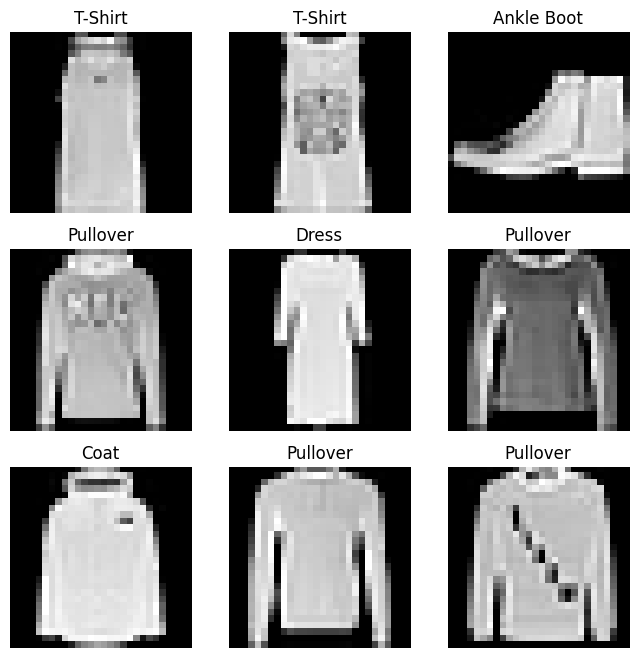

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
train_dataloader = DataLoader(training_data, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle=True)

Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


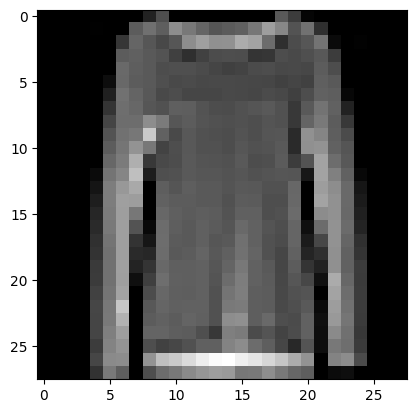

Label: 2


In [7]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[1].squeeze()
label = train_labels[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

In [8]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Build Neural Network

In [10]:
class NeuraLeNetwork(nn.Module):
    def __init__(self):
        super(NeuraLeNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
#initialize
net = NeuraLeNetwork()
net.to(device)

NeuraLeNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
s = torch.jit.script(net)
torch.jit.save(s, "mnistFashion_network.pt")

Model Parameters

In [12]:
print(f"Model structure: {net}\n\n")

for name, param in net.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuraLeNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Layer: conv1.weight | Size: torch.Size([6, 1, 5, 5]) | Values : tensor([[[[-0.0353,  0.1622,  0.1180, -0.0243,  0.1389],
          [-0.1920, -0.1631, -0.1614,  0.0881, -0.1030],
          [ 0.0304,  0.1263, -0.1659,  0.1284,  0.1567],
          [ 0.1862,  0.0571, -0.0544, -0.0697, -0.1559],
          [-0.1616,  0.1682, -0.1435,  0.1527, -0.0215]]],


        [[[-0.0142,  0.0335,  0.1621, -0.1448,  0.1123],
          [ 0.1195, -0.0119, -0.0978,  0.0199, -0.0791],
          [-0.1302,  0.1978,  0.1088, -0.1930, -0.0926],
          [-0.1232, -0.1090, -0.1012, -0.1880,  0.06

Loss Criterion and Optimizer

In [13]:
#loss function
criterion = nn.CrossEntropyLoss()

#specify optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
epochs = 15

# Loss history
train_losses_history = list()
val_losses_history = list()

for epoch in range(epochs):
    net.train()
    train_losses = 0.0
    train_correct = 0
    for i, data in enumerate(train_dataloader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_losses += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_dataloader):.2f}% training loss: {train_losses/len(train_dataloader):.5f}')
    train_losses_history.append(train_losses/len(train_dataloader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_dataloader):.2f}% validation loss: {val_loss/len(test_dataloader):.5f}')
    val_losses_history.append(val_loss/len(test_dataloader))

Epoch 1 training accuracy: 0.11% training loss: 2.29677
Epoch 1 validation accuracy: 0.18% validation loss: 2.28599
Epoch 2 training accuracy: 0.38% training loss: 2.02915
Epoch 2 validation accuracy: 0.60% validation loss: 1.13425
Epoch 3 training accuracy: 0.66% training loss: 0.88151
Epoch 3 validation accuracy: 0.70% validation loss: 0.78240
Epoch 4 training accuracy: 0.72% training loss: 0.71724
Epoch 4 validation accuracy: 0.74% validation loss: 0.68523
Epoch 5 training accuracy: 0.75% training loss: 0.65577
Epoch 5 validation accuracy: 0.75% validation loss: 0.65158
Epoch 6 training accuracy: 0.77% training loss: 0.60999
Epoch 6 validation accuracy: 0.78% validation loss: 0.60023
Epoch 7 training accuracy: 0.78% training loss: 0.57097
Epoch 7 validation accuracy: 0.77% validation loss: 0.59151
Epoch 8 training accuracy: 0.80% training loss: 0.54149
Epoch 8 validation accuracy: 0.80% validation loss: 0.54706
Epoch 9 training accuracy: 0.81% training loss: 0.51738
Epoch 9 validati

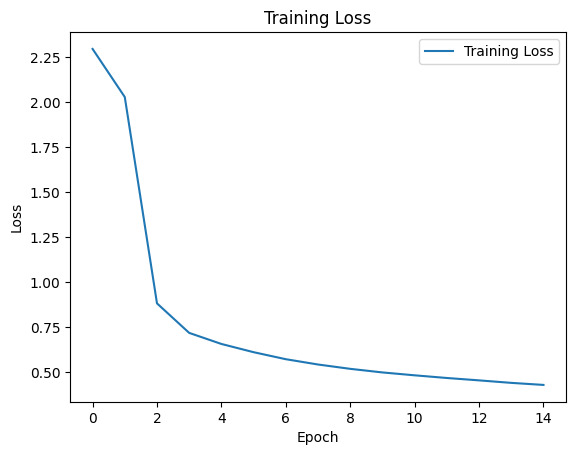

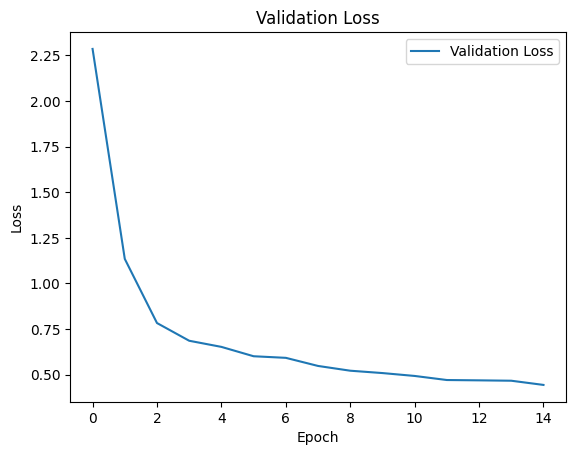

In [15]:
# Train Loss
plt.plot(train_losses_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Validation Loss
plt.plot(val_losses_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

# Test the Model

In [16]:
right = 0
total = 0

# model to evaluation mode
net.eval()

# Iterate over the test dataset
for images, labels in test_dataloader:
    images, labels = images.to(device), labels.to(device)

    # Forward pass
    outputs = net(images)

    # Get predictions
    _, predicted = torch.max(outputs.data, 1)

    # Update total number of samples
    total += labels.size(0)

    # Update number of correct predictions
    right += (predicted == labels).sum().item()

# Compute accuracy
accuracy = 100 * right / total

print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 84.26%


# Save the Model

In [17]:
model_path = 'trained_model.pth'

# Save the model
torch.save(net.state_dict(), model_path)
print(f'Model saved to {model_path}')

Model saved to trained_model.pth
